In [1]:
from VisualizationTools.EventDisplay import EventDisplay
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')

ED = EventDisplay('SimulationOutputs/sim_output_with_process.root')

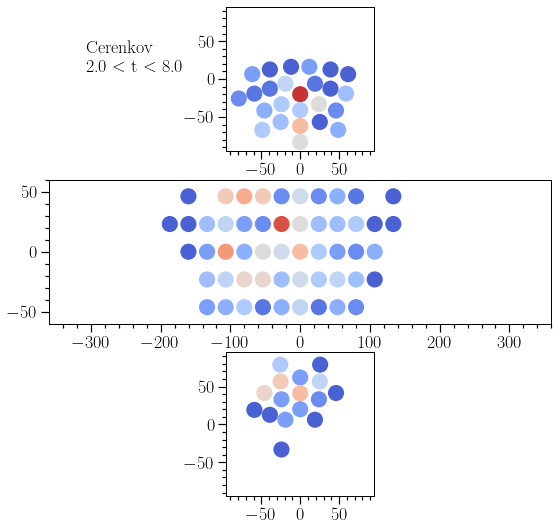

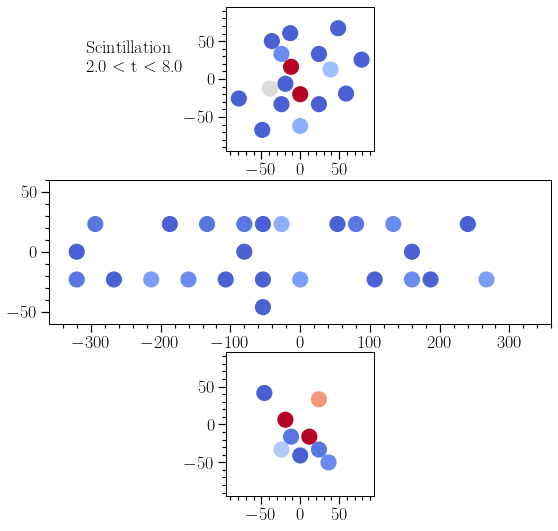

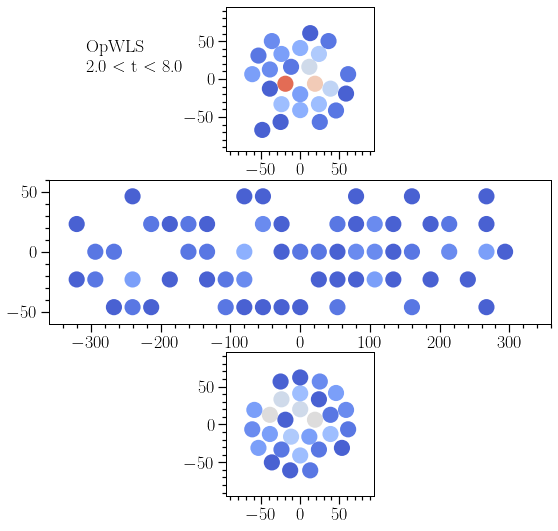

In [5]:
for evenno in range(1):
  for ProcessString in ['Cerenkov','Scintillation','OpWLS']:
    ED.PlotAllPMTsTimeSlice(evenno,(2,8),ProcessString=ProcessString,SaveString='Figures/%s%i.png'%(ProcessString,evenno))


In [ ]:
gif = ED.PlotAllPMTsTimeGif(3,time_width=2,ProcessString='Cerenkov')
gif = ED.PlotAllPMTsTimeGif(3,time_width=2,ProcessString='Scintillation')
gif = ED.PlotAllPMTsTimeGif(3,time_width=2,ProcessString='OpWLS')
#gif.save('test.mp4',dpi=300)

In [ ]:
rowcol = []
for r in range(1,2):
    for c in range(0,100):
        rowcol.append((r,c))
ED.PlotPMTHitsVsTime(3,rowcol,stacked=True)
ED.PlotCoatedVsUncoatedHitsVsTime(3)
ED.PlotAllHitsVsTime(3)